In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")
from helper import meld_score, get_sb, get_inr, get_sc, get_na

In [2]:
sns.set(rc={'figure.figsize':(11.7,18.27)})

In [3]:
THRESHOLD = 20

In [4]:
n_points = 1000
sbs = [get_sb(use_mean=True)]*n_points + [get_sb(healthy=False,use_mean=True)]*n_points
inrs = [get_inr(use_mean=True)]*n_points + [get_inr(healthy=False,use_mean=True)]*n_points 
scs = [get_sc() for _ in range(n_points)] + [get_sc(healthy=False) for _ in range(n_points)]
nas = [get_na(use_mean=True)]*n_points + [get_na(healthy=False,use_mean=True)]*n_points 
health = ["healthy"]*n_points + ["unhealthy"]*n_points

data = pd.DataFrame({
    "bilirubin": sbs,
    "INR": inrs,
    "creatinine": scs,
    "na": nas,
    "MELD-Na": [meld_score(sb,inr,sc,na) for sb,inr,sc,na in zip(sbs,inrs,scs,nas)],
    "health": health 
})

data.head()

,bilirubin,INR,creatinine,na,MELD-Na,health
0,1.1,1.0,1.065223,140,7.394944,healthy
1,1.1,1.0,0.979991,140,6.790272,healthy
2,1.1,1.0,0.996696,140,6.790272,healthy
3,1.1,1.0,1.161926,140,8.226529,healthy
4,1.1,1.0,0.894659,140,6.790272,healthy


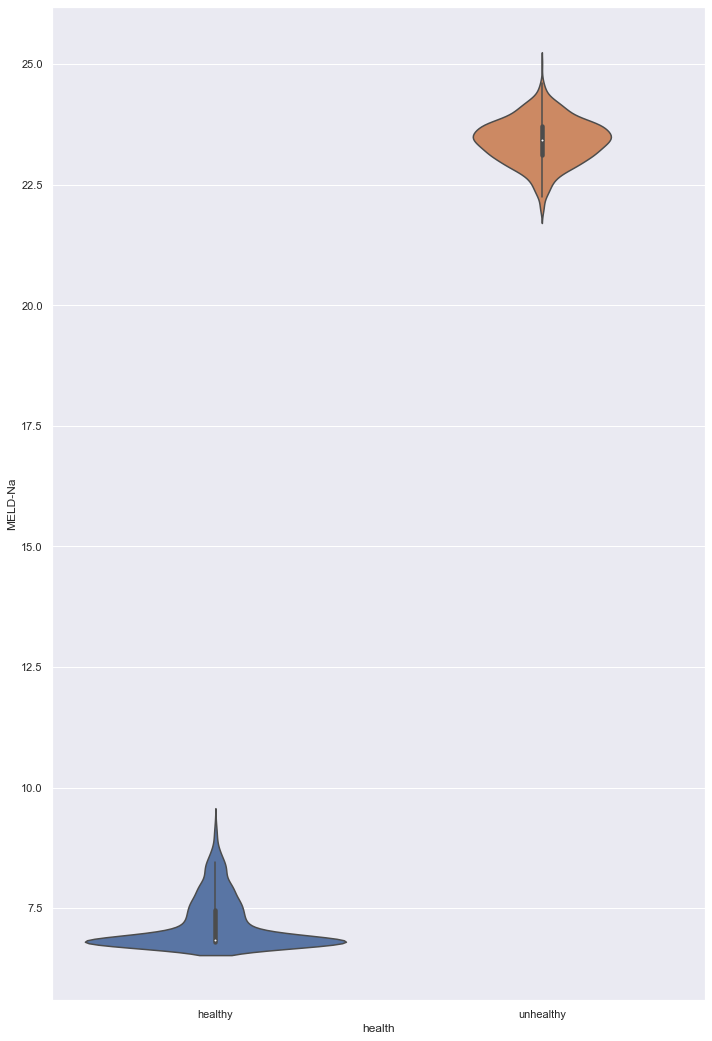

In [5]:
ax = sns.violinplot(x = "health", y = "MELD-Na", data=data)

In [6]:
fp = len(data[(data['MELD-Na']>=THRESHOLD) & (data['health']=="healthy")]) / n_points
fn = len(data[(data['MELD-Na']<THRESHOLD) & (data['health']=="unhealthy")]) / n_points

print(f"False positives rate: {fp}")
print(f"False negatives rate: {fn} (Can lead to patients at risk not receiving enough treatment)")

False positives rate: 0.0
False negatives rate: 0.0 (Can lead to patients at risk not receiving enough treatment)


## External cause of variance

Assuming an external cause of variance (temperature, season, storage), we want to see its effect. I will model it with a decrease in creatinine of mean 0.5 and spread 0.2

In [7]:
n_points = 1000
sbs = [get_sb(use_mean=True)]*n_points + [get_sb(healthy=False,use_mean=True)]*n_points
inrs = [get_inr(use_mean=True)]*n_points + [get_inr(healthy=False,use_mean=True)]*n_points 
scs = [get_sc() - np.random.normal(0.5,0.1) for _ in range(n_points)] + [get_sc(healthy=False) - np.random.normal(0.5,0.1) for _ in range(n_points)]
nas = [get_na(use_mean=True)]*n_points + [get_na(healthy=False,use_mean=True)]*n_points 
health = ["healthy"]*n_points + ["unhealthy"]*n_points

data = pd.DataFrame({
    "bilirubin": sbs,
    "INR": inrs,
    "creatinine": scs,
    "na": nas,
    "MELD-Na": [meld_score(sb,inr,sc,na) for sb,inr,sc,na in zip(sbs,inrs,scs,nas)],
    "health": health 
})

data.head()

,bilirubin,INR,creatinine,na,MELD-Na,health
0,1.1,1.0,0.491360,140,6.790272,healthy
1,1.1,1.0,0.601464,140,6.790272,healthy
2,1.1,1.0,0.339232,140,6.790272,healthy
3,1.1,1.0,0.503916,140,6.790272,healthy
4,1.1,1.0,0.629456,140,6.790272,healthy


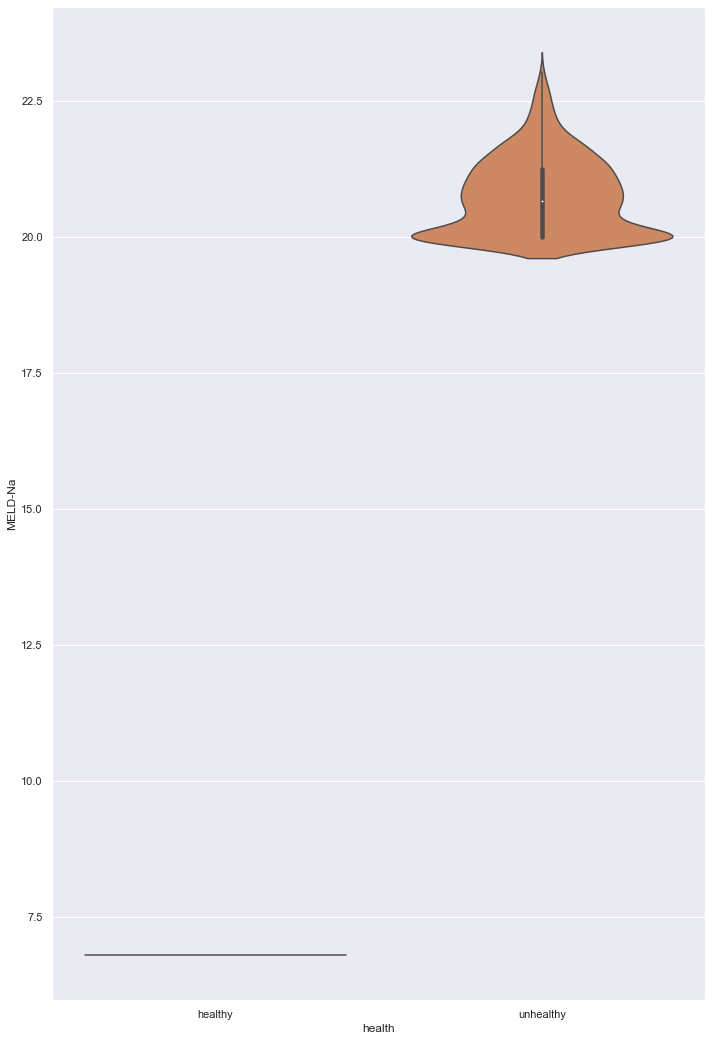

In [8]:
ax = sns.violinplot(x = "health", y = "MELD-Na", data=data)

In [9]:
fp = len(data[(data['MELD-Na']>=THRESHOLD) & (data['health']=="healthy")]) / n_points
fn = len(data[(data['MELD-Na']<THRESHOLD) & (data['health']=="unhealthy")]) / n_points

print(f"False positives rate: {fp}")
print(f"False negatives rate: {fn} (Can lead to patients at risk not receiving enough treatment)")

False positives rate: 0.0
False negatives rate: 0.247 (Can lead to patients at risk not receiving enough treatment)


The shift in creatinine adds to the naturally occuring variance and makes the spread of MELD scores wider